# Análisis de Tweets: Introducción a Estadística y Análisis de Datos

Este análisis explora conceptos fundamentales de estadística y análisis de datos, trabajando con datos de tweets durante las elecciones americanas de 2020.

**Análisis 1**  Cargar el fichero de la url indicada (es un csv) dejando el resultado en una variable `df`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# solución
df = pd.read_csv('https://github.com/RafaelCaballero/tdm/raw/refs/heads/master/datos/userc20.zip') # para leer el archivo
df

,screen_name,total,verificado
0,MCtai48,585,0
1,jnikas1_joanne,1,0
2,vmsmith678,1,0
3,felixthecat63,33,0
4,julie_cappiello,752,0
...,...,...,...
390197,cosmicsugarr,1,0
390198,RandyBaker,1,0
390199,finkleismayor,3,0
390200,mikegreentv,2,0


**Análisis 2** La columna `screen_name` representa el nombre de un usuario en X y el valor `total` es el número de tweets incluidos durante el entorno de las elecciones americanas de 2020.
 Mostrar el histograma de la columna  `total` incluyendo la función de densidad


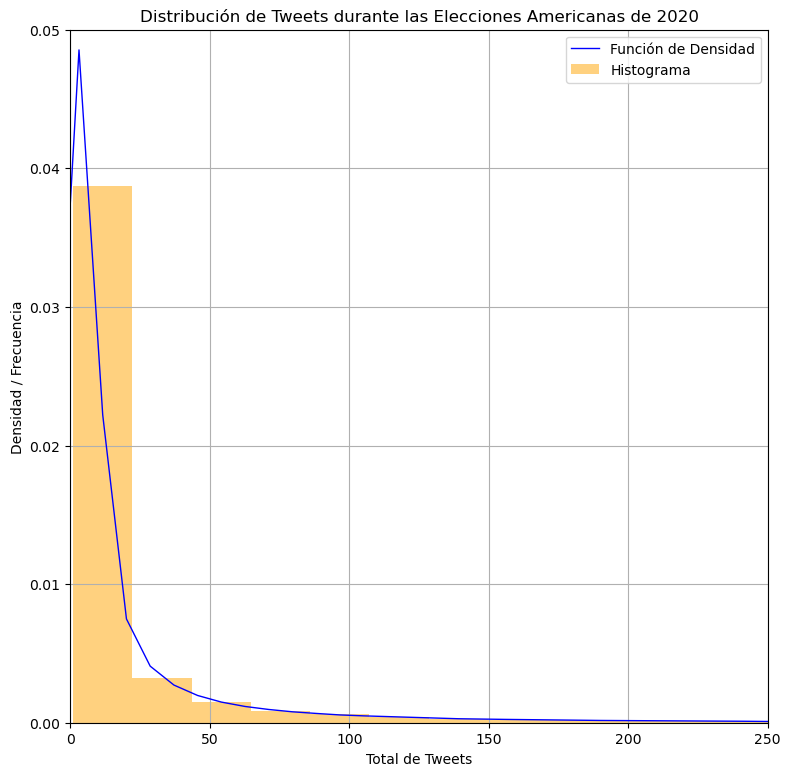

In [2]:
plt.figure(figsize=(9,9)) 

ax = df.total.plot(kind="density", color="blue", linestyle='-',linewidth=1, xlim=(0,250), label='Función de Densidad')

df.total.plot(kind="hist", density=True, alpha=0.5, bins=200, ax=ax,color='orange', label='Histograma')
#print(df)

plt.title('Distribución de Tweets durante las Elecciones Americanas de 2020')
plt.xlabel('Total de Tweets')
plt.ylabel('Densidad / Frecuencia')

plt.ylim(0, 0.05) 

plt.legend()

plt.grid()
plt.show()

In [ ]:
# Me quedé con la duda de cuantos bins usar, más allá de ir probando visualmente, 
# me encontré con 3 reglas para determinar el número de bins en un histograma,
# me parecio interesante, sería bueno profundizar un poco en algunas de ellas en alguna clase futura.

# Regla de Sturges
# Regla de Freedman-Diaconis
# Regla de Scott

**Análisis 3** Uff, es muy lento. Con un 10 por ciento sería suficiente para este tipo de gráfica. Escribir código para obtener una muestra aleatoria simple 
`df_peque` que tenga el 10% de las filas de `df`. Mostrar la media de la columna `total`en ambos dataframes (método `mean()`). 

In [3]:
# Generar la muestra aleatoria del 10% del DataFrame original
df_peque = df.sample(frac=0.1)

# Calcular la media de la columna total en ambos DataFrames
media_total_df = df.total.mean()
media_total_peque = df_peque.total.mean()

print(f'Media de la columna total en el DataFrame original: {media_total_df}')
print(f'Media de la columna total en el DataFrame de muestra con es: {media_total_peque}')

Media de la columna total en el DataFrame original: 22.259014561688563
Media de la columna total en el DataFrame de muestra con es: 22.63329062019477


**Análisis 4** Repetir el histograma de la columna `total`sobre `df_peque`.

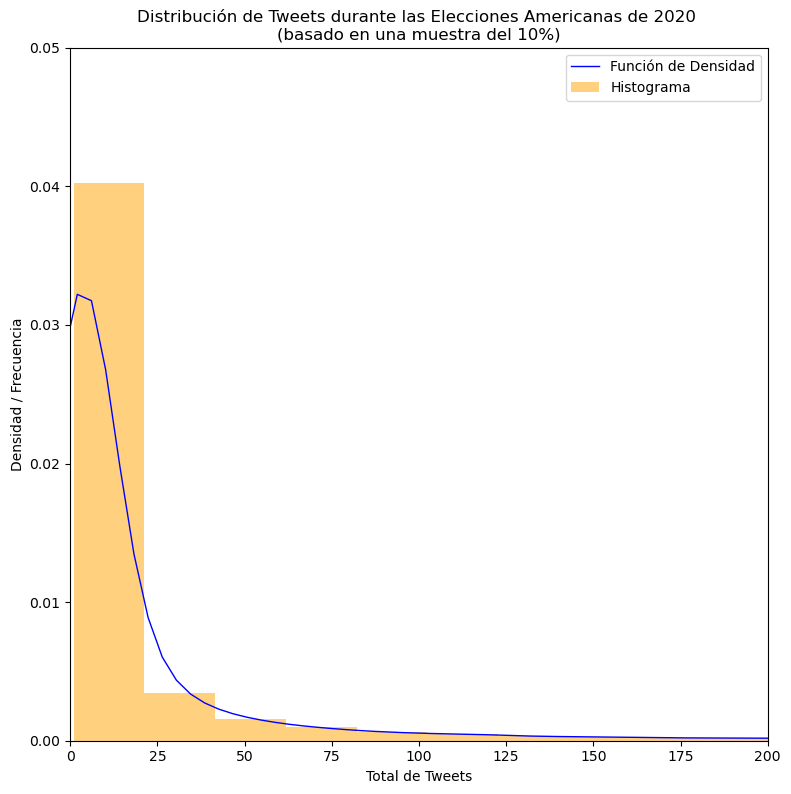

In [4]:
plt.figure(figsize=(9, 9)) 

ax = df_peque.total.plot(kind="density", color="blue", linestyle='-',linewidth=1, xlim=(0,250), label='Función de Densidad')
df_peque.total.plot(kind="hist", density=True, alpha=0.5, bins=100, ax=ax,color='orange', label='Histograma')
plt.title('Distribución de Tweets durante las Elecciones Americanas de 2020 \n(basado en una muestra del 10%)')
plt.xlabel('Total de Tweets')
plt.ylabel('Densidad / Frecuencia')

plt.ylim(0, 0.050) 
plt.xlim(0, 200) 

plt.legend()

plt.show()

**Análisis 5** Crear un dataframe `df_peque2` que tenga solo para aquellos usuarios que tengan al menos 2 tweets (`df_peque.total>=2`) dentro de `df_peque`. Mostrar el histograma correspondiente.

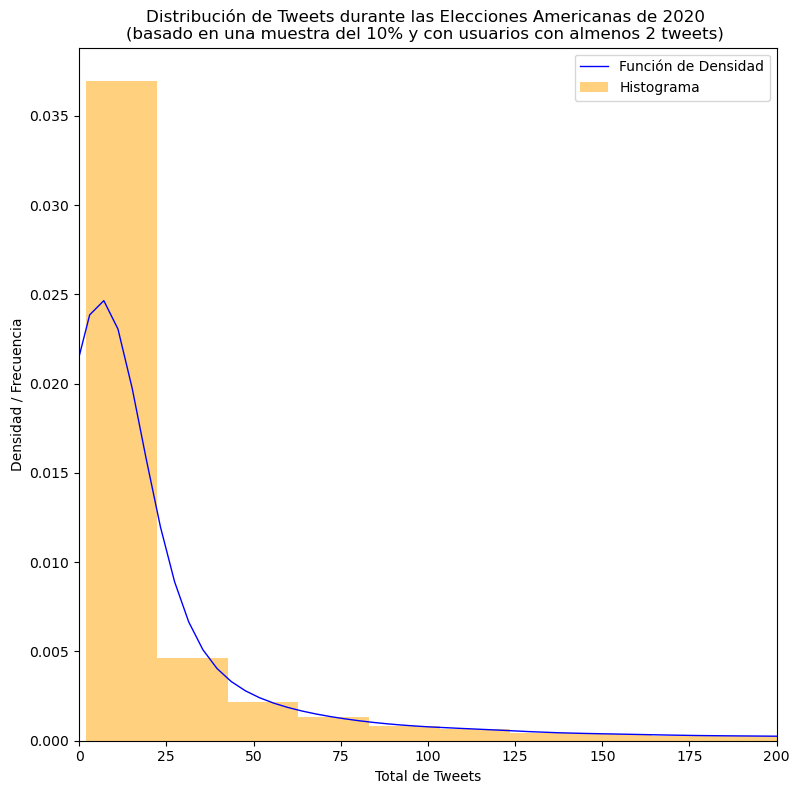

In [6]:
#Filtrado de los datos
df_peque2 = df_peque.loc[
    df_peque.total>=2
    ]
df_peque2


#Grafico
plt.figure(figsize=(9, 9)) 
ax = df_peque2.total.plot(kind="density", color="blue", linestyle='-',linewidth=1, xlim=(0,200), label='Función de Densidad')
df_peque2.total.plot(kind="hist", density=True, alpha=0.5, bins=100, ax=ax,color='orange', label='Histograma')


plt.title('Distribución de Tweets durante las Elecciones Americanas de 2020 \n(basado en una muestra del 10% y con usuarios con almenos 2 tweets) ')
plt.xlabel('Total de Tweets')
plt.ylabel('Densidad / Frecuencia')

#plt.ylim(0, 0.04) 
#plt.xlim(0, 200) 

plt.legend()

plt.show()

**Análisis 6** ¿Qué valores toma la columna `verificado`? ¿Cuál es la proporción de usuarios verificados (col. `verificado` igual a 1) en `df`?  ¿qué distribución podemos asociar inicialmente a esta columna?

In [7]:
#Verificados = 1
valores_verificado = df.verificado.unique()
print(f"Valores únicos de la columna 'verificado': {valores_verificado}")

proporcion_verificado = (df.verificado.sum()/len(df))
proporcion_verificado

print(f'La proporción de usuarios verificados de df es: {proporcion_verificado}')

#La distribución que podriamos asociar inicialmente a esta columna es la distribución binomial.

Valores únicos de la columna 'verificado': [0 1]
La proporción de usuarios verificados de df es: 0.021822030640540026


**Análisis 7** Queremos obtener otra muestra de `df`, a la que llamaremos `df_verif`, que tenga el 1% de datos pero que mantenga aproximadamente la proporción de verificados del dataframe `df`. Mostrar la proporción de verificados en `df_verif`

In [38]:
from sklearn.model_selection import train_test_split
import pandas as pd

_, df_verif = train_test_split(df, test_size=0.01, stratify=df.verificado,random_state=42)

proporcion = (df_verif.verificado.sum()/len(df_verif))
print(f'Proporción de verificados en el conjunto de prueba: {proporcion}')

Proporción de verificados en el conjunto de prueba: 0.02177811939533692


**Análisis 8** Asumiendo que la columna `total` sigue una distribución geométrica, nos gustaría estimar el valor de la probabilidad $p$ de que se emita un tweet (ver el notebook de teoría para la estimación de $p$ en una distribución geométrica). ¿Interesa en este caso usar `df` o `df_peque`?

In [104]:
# solución

#Yo tomaria df ya que es el mas representativo de la poblacion completa (aunque probé con todos y no cambió mucho el resultado)

media_total = df['total'].mean()

p = 1 / media_total

print(f"Valor estimado de la probabilidad p: {p}")

Valor estimado de la probabilidad p: 0.044925618662434635
Valor estimado de la probabilidad p: 0.044285250582790266
Valor estimado de la probabilidad p: 0.03203387765330121
Valor estimado de la probabilidad p: 0.04440374069944709


**Análisis 9** ¿Cuál sería la probabilidad `p_pred` de que se emitan 6 tweets? Utilizar la fórmula de la distribución geométrica y la $p$ del apartado anterior (recordamos que $P(X = k) = (1 - p)^{k-1} p$). Calcular también la proporción real de usuarios con `total==6` y mostrar ambos resultados.

In [40]:
# solución
p = 1 / df['total'].mean()
k = 6
p_pred = (1 - p)**(k - 1) * p

proporcion_real = (df['total'] == 6).mean()

print(f"Probabilidad predicha de que se emitan {k} tweets (p_pred): {p_pred:.6f}")
print(f"Proporción real de usuarios con total == {k}: {proporcion_real:.6f}")

diferencia = abs(p_pred - proporcion_real)
print(f"Diferencia absoluta entre p_pred y la proporción real: {diferencia:.6f}")


Probabilidad predicha de que se emitan 6 tweets (p_pred): 0.035701
Proporción real de usuarios con total == 6: 0.033039
Diferencia absoluta entre p_pred y la proporción real: 0.002662


**Análisis 10** Consideramos los sucesos

A: El usuario ha escrito más de 5 tweets (total>5)

B: El usuario está verificado

Calcular 
- La probabilidad de A (usando la regla de Laplace, es decir la proporción de usuarios con más de 5 tweets en df). Dejar el resultado en una variable PA
- PB: la probabilidad de B.
- PI: Probabilidad de $P(A \cap B)$. Calcularla también con la regla de Laplace: número de usuarios que verifican A y B simultaneamente dividido por número total de usuarios.
- PAB: la probabilidad condicionada de que haya escrito 5 tweets sabiendo que está verificado (
$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$
)
- PBA: la probabilidad de que esté verificado sabiendo que ha escrito más de 5 tweets ($P(B|A) = \frac{P(B \cap A)}{P(A)}$)
- PAB2: de nuevo $P(A|B)$ pero ahora calculado con el Teorema de Bayes: $P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$

In [116]:
## Solución
# Calcular PA: Probabilidad de A (total > 5)
PA = (df['total'] > 5).mean()

# Calcular PB: Probabilidad de B (usuario verificado)
PB = (df['verificado'] == 1).mean()

# Calcular PI: Probabilidad de A ∩ B (total > 5 y usuario verificado)
PI = ((df['total'] > 5) & (df['verificado'] == 1)).mean()

# Calcular PAB: Probabilidad condicionada de A dado B
PAB = PI / PB

# Calcular PBA: Probabilidad condicionada de B dado A
PBA = PI / PA

# Calcular PAB2 usando el Teorema de Bayes
PAB2 = (PBA * PA) / PB

## para mostrar el resultado:
print(f"P(A): {PA:.2f}, P(B): {PB:.2f}, P(B|A): {PBA:.2f},  P(A|B): {PAB:.2f}, P(A|B) (Bayes): {PAB2:.2f}")

P(A): 0.40, P(B): 0.02, P(B|A): 0.02,  P(A|B): 0.41, P(A|B) (Bayes): 0.41


¡No olvidar subir la solución a Google Scholar!